# Spam Email Detection

This project implements a machine learning pipeline to classify emails as spam or not spam using natural language processing and various classification algorithms. The dataset is preprocessed to clean text data, vectorized, and then used to train multiple models to determine the most effective classifier.

## Features
- Data cleaning (removing punctuation, stop words, stemming).
- Splitting the data into training and test sets.
- Testing multiple machine learning classifiers:
  - Logistic Regression
  - Decision Tree
  - Random Forest Classifier
  - K-Nearest Neighbors
  - Naïve Bayes
- Performance evaluation using metrics like accuracy, confusion matrix, and classification report.

## Dataset
The project uses the [Spam Mails Dataset](https://www.kaggle.com/venky73/spam-mails-dataset), which contains labeled email messages with labels `0` (not spam) and `1` (spam).

## Results

- Logistic Regression achieved the highest accuracy of **98%** on the test dataset.

# Importing Libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing data

In [4]:
dataset = pd.read_csv('spam_ham_dataset.csv')
dataset.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


# Data Exploration

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


In [6]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,5171.0,2585.000000,1492.883452,0.0,1292.5,2585.0,3877.5,5170.0
label_num,5171.0,0.289886,0.453753,0.0,0.0,0.0,1.0,1.0


In [7]:
dataset.isnull().sum()

Unnamed: 0    0
label         0
text          0
label_num     0
dtype: int64

In [8]:
dataset.shape

(5171, 4)

In [9]:
dataset['label'].value_counts()

label
ham     3672
spam    1499
Name: count, dtype: int64

C:\Users\admin\AppData\Local\Temp\ipykernel_2696\1729229091.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dataset["label"].value_counts().index, y=dataset["label"].value_counts().values, palette="viridis")


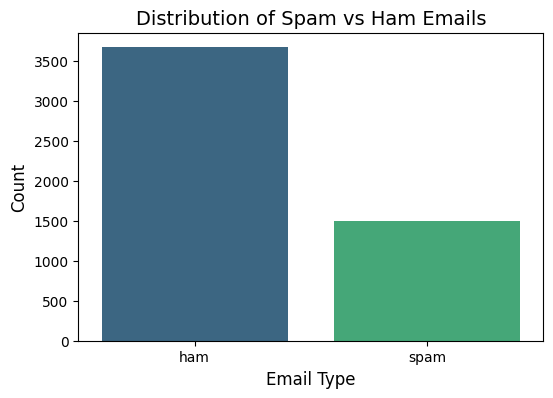

In [10]:
plt.figure(figsize=(6, 4))
sns.barplot(x=dataset["label"].value_counts().index, y=dataset["label"].value_counts().values, palette="viridis")

plt.title("Distribution of Spam vs Ham Emails", fontsize=14)
plt.xlabel("Email Type", fontsize=12)
plt.ylabel("Count", fontsize=12)

plt.show()

In [11]:
dataset['label'].value_counts(normalize=True) * 100

label
ham     71.01141
spam    28.98859
Name: proportion, dtype: float64

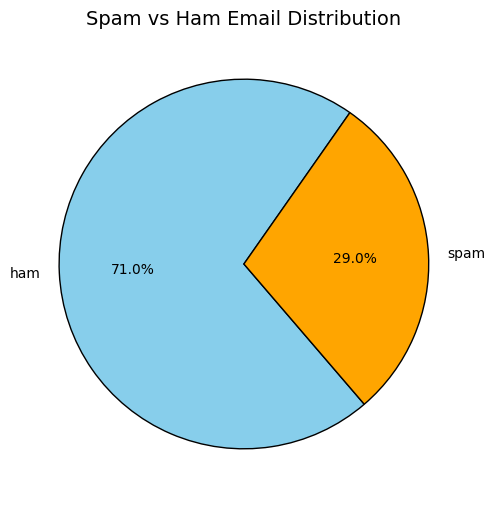

In [12]:
plt.figure(figsize=(6, 6))
plt.pie(dataset["label"].value_counts(normalize=True).values*100, labels=dataset["label"].value_counts().index,
        autopct='%1.1f%%', colors=["skyblue", "orange"], startangle=55, wedgeprops={'edgecolor': 'black'})

plt.title("Spam vs Ham Email Distribution", fontsize=14)

plt.show()

In [13]:
dataset.isna().sum()

Unnamed: 0    0
label         0
text          0
label_num     0
dtype: int64

In [14]:
dataset.duplicated().sum()

np.int64(0)

* so we have no null and duplicate value
* we only need text and label num for our purpose

In [15]:
df = dataset[['text','label_num']]
df.head()

,text,label_num
0,Subject: enron methanol ; meter # : 988291\r\n...,0
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,"Subject: photoshop , windows , office . cheap ...",1
4,Subject: re : indian springs\r\nthis deal is t...,0


In [16]:
length = len(df['text'])

# Data  Preprocessing 

* We will remove punctuation and other unnecessary item from our text
* Then will be stemming the word to its root form 

1. Exmeple of stop words
- the, a, an, is, are, was, were, of, to, for, in, on, at, by, that, it, he, she, they, and, ...

2. Stemming

- Before stemming: \
    'caresses', 'flies', 'dies', 'mules', 'denied', \
    'died', 'agreed', 'owned', 'humbled', 'sized', \
    'meeting', 'stating', 'siezing', 'itemization', 'sensational', \
    'traditional', 'reference', 'colonizer','plotted'

- After stemming: \
    caress fli die mule deni die agre own humbl size meet \
    state siez item sensat tradit refer colon plot]

In [17]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

corpus=[]
# contain list of words that will be used for training -> final words after cleaning

for i in range(0,length):
  # re is used to remove punctuations
  text = re.sub('[^a-zA-Z]',' ',df['text'][i]) # replaces the punctuation with space

  # converting to lowercase
  text=text.lower()

  # stemming
  text=text.split()
  ps = PorterStemmer()
  all_stopwords=stopwords.words('english')
  text = [ps.stem(word) for word  in text if not word in set(all_stopwords)]
  text = ' '.join(text)

  corpus.append(text)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [18]:
corpus[0:5]

['subject enron methanol meter follow note gave monday preliminari flow data provid daren pleas overrid pop daili volum present zero reflect daili activ obtain ga control chang need asap econom purpos',
 'subject hpl nom januari see attach file hplnol xl hplnol xl',
 'subject neon retreat ho ho ho around wonder time year neon leader retreat time know time year extrem hectic tough think anyth past holiday life go past week decemb januari like think minut calend hand begin fall semest retreat schedul weekend januari youth minist confer brad dustin connect week go chang date follow weekend januari come part need think think agre import us get togeth time recharg batteri get far spring semest lot troubl difficult us get away without kid etc brad came potenti altern get togeth weekend let know prefer first option would retreat similar done past sever year year could go heartland countri inn www com outsid brenham nice place bedroom bedroom hous side side countri real relax also close brenha

In [19]:
df = df.copy()

In [20]:
df['cleanText'] = corpus

In [21]:
df

,text,label_num,cleanText
0,Subject: enron methanol ; meter # : 988291\r\n...,0,subject enron methanol meter follow note gave ...
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,subject hpl nom januari see attach file hplnol...
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,subject neon retreat ho ho ho around wonder ti...
3,"Subject: photoshop , windows , office . cheap ...",1,subject photoshop window offic cheap main tren...
4,Subject: re : indian springs\r\nthis deal is t...,0,subject indian spring deal book teco pvr reven...
...,...,...,...
5166,Subject: put the 10 on the ft\r\nthe transport...,0,subject put ft transport volum decreas contrac...
5167,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0,subject follow nom hpl take extra mmcf weekend...
5168,Subject: calpine daily gas nomination\r\n>\r\n...,0,subject calpin daili ga nomin juli mention ear...
5169,Subject: industrial worksheets for august 2000...,0,subject industri worksheet august activ attach...


In [22]:
df['cleanText']=df['cleanText'].str.replace('subject', '')

In [23]:
df

,text,label_num,cleanText
0,Subject: enron methanol ; meter # : 988291\r\n...,0,enron methanol meter follow note gave monday ...
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,hpl nom januari see attach file hplnol xl hpl...
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,neon retreat ho ho ho around wonder time year...
3,"Subject: photoshop , windows , office . cheap ...",1,photoshop window offic cheap main trend abas ...
4,Subject: re : indian springs\r\nthis deal is t...,0,indian spring deal book teco pvr revenu under...
...,...,...,...
5166,Subject: put the 10 on the ft\r\nthe transport...,0,put ft transport volum decreas contract thank...
5167,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0,follow nom hpl take extra mmcf weekend tri ne...
5168,Subject: calpine daily gas nomination\r\n>\r\n...,0,calpin daili ga nomin juli mention earlier ho...
5169,Subject: industrial worksheets for august 2000...,0,industri worksheet august activ attach worksh...


# splitting data into training set and test set

In [24]:
x=df.loc[:,'cleanText'].values
y=df.loc[:,'label_num'].values

In [25]:
# from sklearn.feature_extraction.text import CountVectorizer
# cv = CountVectorizer()
# x = cv.fit_transform(x).toarray()

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Assurez-vous que 'text' est bien le nom de la colonne contenant les e-mails
vectorizer = TfidfVectorizer()
X_transformed = vectorizer.fit_transform(dataset['text'])  # Transformer le texte en valeurs numériques

# Définir la variable cible
y = dataset['label']  # Remplace 'label' par le vrai nom de ta colonne cible

# Séparer les données en train/test
x_train, x_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

# Vérification après transformation
print(type(x_train))  # Doit afficher <class 'scipy.sparse._csr.csr_matrix'>


<class 'scipy.sparse._csr.csr_matrix'>


In [27]:
x

array([' enron methanol meter follow note gave monday preliminari flow data provid daren pleas overrid pop daili volum present zero reflect daili activ obtain ga control chang need asap econom purpos',
       ' hpl nom januari see attach file hplnol xl hplnol xl',
       ' neon retreat ho ho ho around wonder time year neon leader retreat time know time year extrem hectic tough think anyth past holiday life go past week decemb januari like think minut calend hand begin fall semest retreat schedul weekend januari youth minist confer brad dustin connect week go chang date follow weekend januari come part need think think agre import us get togeth time recharg batteri get far spring semest lot troubl difficult us get away without kid etc brad came potenti altern get togeth weekend let know prefer first option would retreat similar done past sever year year could go heartland countri inn www com outsid brenham nice place bedroom bedroom hous side side countri real relax also close brenham o

In [28]:
x[453]

' dave n pocket next week beyond class next week hyatt unifi perform issu need immedi attent pleas call jim ogg kishor b russ whitton alreadi pager number also next month offic space gut built locat allen center th floor conveni phone number feel free send postcard n'

In [29]:
y

0        ham
1        ham
2        ham
3       spam
4        ham
        ... 
5166     ham
5167     ham
5168     ham
5169     ham
5170    spam
Name: label, Length: 5171, dtype: object

# Classifiying using various classifier

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB

In [31]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

In [32]:
def train_test_model(model):
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    score=accuracy_score(y_test,y_pred)
    print(f'accuracy score of {model} is :{score}')
    print(f'{classification_report(y_test,y_pred)}')
    mx=confusion_matrix(y_test,y_pred)
    sns.heatmap(mx,annot=True, fmt='d', cmap='Blues', xticklabels=['Not spam', 'spam'], yticklabels=['Not spam', 'spam'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
   

accuracy score of LogisticRegression() is :0.9826086956521739
              precision    recall  f1-score   support

         ham       0.99      0.98      0.99       742
        spam       0.96      0.98      0.97       293

    accuracy                           0.98      1035
   macro avg       0.98      0.98      0.98      1035
weighted avg       0.98      0.98      0.98      1035



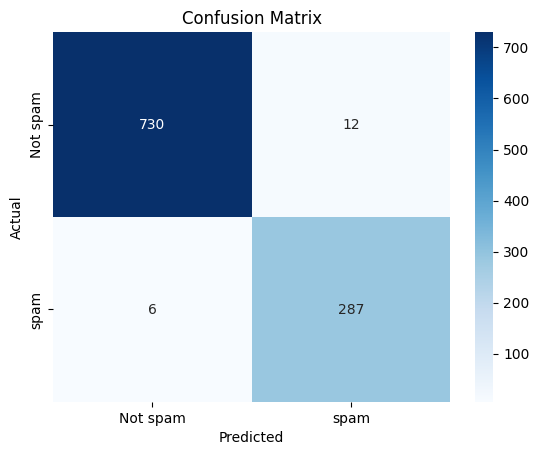

In [33]:
train_test_model(LogisticRegression())

accuracy score of DecisionTreeClassifier(max_depth=20) is :0.9497584541062802
              precision    recall  f1-score   support

         ham       0.97      0.96      0.96       742
        spam       0.90      0.93      0.91       293

    accuracy                           0.95      1035
   macro avg       0.93      0.94      0.94      1035
weighted avg       0.95      0.95      0.95      1035



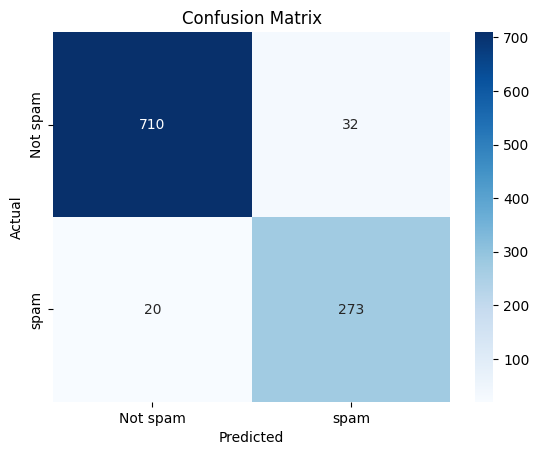

In [34]:
train_test_model(DecisionTreeClassifier(max_depth=20))

accuracy score of RandomForestClassifier() is :0.9806763285024155
              precision    recall  f1-score   support

         ham       0.98      0.99      0.99       742
        spam       0.97      0.96      0.97       293

    accuracy                           0.98      1035
   macro avg       0.98      0.97      0.98      1035
weighted avg       0.98      0.98      0.98      1035



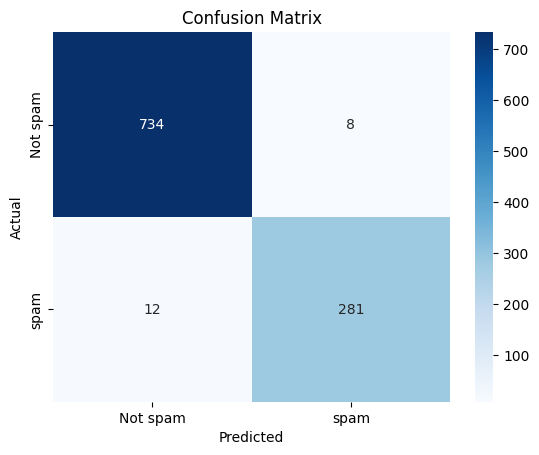

In [35]:
train_test_model(RandomForestClassifier())

accuracy score of KNeighborsClassifier(n_neighbors=2) is :0.927536231884058
              precision    recall  f1-score   support

         ham       0.91      1.00      0.95       742
        spam       1.00      0.75      0.85       293

    accuracy                           0.93      1035
   macro avg       0.95      0.87      0.90      1035
weighted avg       0.93      0.93      0.92      1035



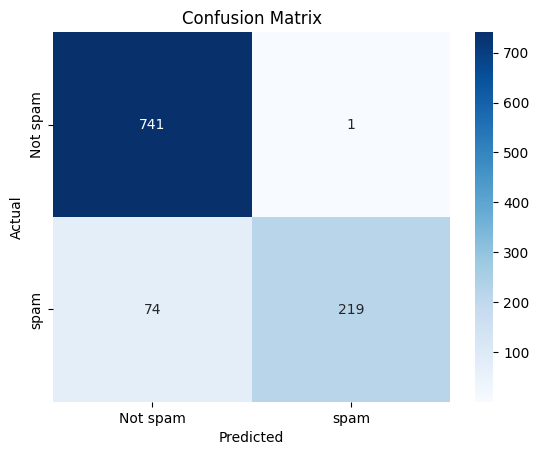

In [36]:
train_test_model(KNeighborsClassifier(n_neighbors=2))

accuracy score of MultinomialNB() is :0.8782608695652174
              precision    recall  f1-score   support

         ham       0.85      1.00      0.92       742
        spam       1.00      0.57      0.73       293

    accuracy                           0.88      1035
   macro avg       0.93      0.78      0.82      1035
weighted avg       0.90      0.88      0.87      1035



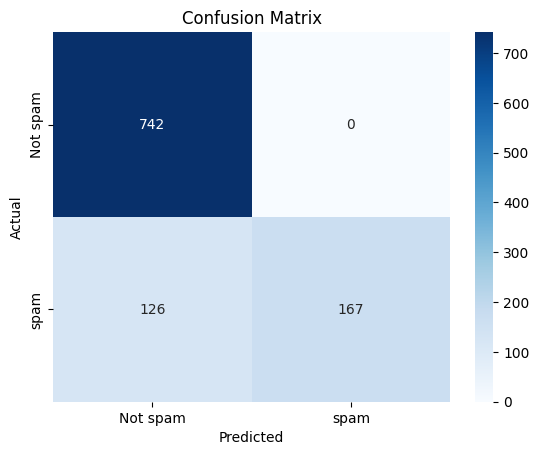

In [37]:
train_test_model(MultinomialNB())

# 

# Result and inference

so we could see that our model has done better as it is better to use the model than saying that mail is not spam

we could see that `logistic regression` has better accuracy i.e of `98`% 
* Improvements can be done by tuning the hyperparameters

In [38]:

from sklearn.model_selection import GridSearchCV

param_grid_dt = {'max_depth': [10, 20, 30], 'criterion': ['gini', 'entropy']}
param_grid_rf = {'n_estimators': [50, 100, 200], 'max_depth': [10, 20, 30]}
param_grid_knn = {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}

dt_grid = GridSearchCV(DecisionTreeClassifier(), param_grid_dt, cv=5, scoring='accuracy', n_jobs=-1)
rf_grid = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)
knn_grid = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring='accuracy', n_jobs=-1)

In [39]:
dt_grid.fit(x_train, y_train)
rf_grid.fit(x_train, y_train)
knn_grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [3, 5, 7],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [40]:
print("Best Decision Tree params:", dt_grid.best_params_, "Score:", dt_grid.best_score_)
print("Best Random Forest params:", rf_grid.best_params_, "Score:", rf_grid.best_score_)
print("Best KNN params:", knn_grid.best_params_, "Score:", knn_grid.best_score_)

dt_best = dt_grid.best_estimator_
rf_best = rf_grid.best_estimator_
knn_best = knn_grid.best_estimator_

print("Decision Tree Test Accuracy:", dt_best.score(x_test, y_test))
print("Random Forest Test Accuracy:", rf_best.score(x_test, y_test))
print("KNN Test Accuracy:", knn_best.score(x_test, y_test))

Best Decision Tree params: {'criterion': 'gini', 'max_depth': 30} Score: 0.9376198237036257
Best Random Forest params: {'max_depth': 30, 'n_estimators': 200} Score: 0.9455984321422521
Best KNN params: {'n_neighbors': 3, 'weights': 'distance'} Score: 0.9608310113383454
Decision Tree Test Accuracy: 0.9516908212560387
Random Forest Test Accuracy: 0.9594202898550724
KNN Test Accuracy: 0.9507246376811594
